In [3]:
import os
import math
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [93]:
path_file = os.sep.join(['data', 'dm_vysledky_studentu_v_predmetech_mv_studium_dim.csv'])
studium_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join(['created_data', 'matrix_bak.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'matrix_mag.csv'])
matrix_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'courses_matrix_bak.csv'])
courses_matrix_bak = pd.read_csv(path_file)

path_file = os.sep.join(['created_data', 'courses_matrix_mag.csv'])
courses_matrix_mag = pd.read_csv(path_file)

path_file = os.sep.join(['created_data', 'failed_students_bak.npy'])
failed_students_bak = np.load(path_file)
path_file = os.sep.join(['created_data', 'successful_students_bak.npy'])
successful_students_bak = np.load(path_file)

path_file = os.sep.join(['created_data', 'failed_students_mag.npy'])
failed_students_mag = np.load(path_file)
path_file = os.sep.join(['created_data', 'successful_students_mag.npy'])
successful_students_mag = np.load(path_file)

path_file = os.sep.join(['created_data', 'klasifikace_fact_bak_09.csv'])
klasifikace_fact_bak_09 = pd.read_csv(path_file, sep=",")
path_file = os.sep.join(['created_data', 'klasifikace_fact_mag_09.csv'])
klasifikace_fact_mag_09 = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'courses_tran_id_kod.pkl'])
file = open(path_file, 'rb')
courses_tran_id_kod = pickle.load(file)

path_file = os.sep.join(['created_data', 'courses_tran_kod_id.pkl'])
file = open(path_file, 'rb')
courses_tran_kod_id = pickle.load(file)

In [110]:
studium_dim[studium_dim.studium_id.isin(failed_students_bak)]

,studium_id,typ_programu,forma_studia,datum_zahajeni,datum_ukonceni,rocnik,studijni_stav,studuje,zamereni_id,fakulta_id,nazev_fakulty,jazyk_vyuky,ukonceni_zpusob,platby_stav,pruchod,rok_maturity,odkud_skola_kod
5154,17929506,B,P,2020-07-09,2021-09-29,2.0,3,K,NaN,10,Fakulta informačních technologií,CS,2.0,NaN,NaN,2020-01-01,60446218.0
5155,17931206,B,P,2020-07-09,2021-09-29,2.0,3,K,NaN,10,Fakulta informačních technologií,CS,2.0,NaN,6.207608e+11,2020-01-01,999999703.0
5156,15569706,B,P,2018-06-28,2021-09-29,4.0,3,K,NaN,10,Fakulta informačních technologií,CS,2.0,NaN,NaN,2017-01-01,600009785.0
5157,16729706,B,P,2019-06-27,2021-09-30,3.0,3,K,NaN,10,Fakulta informačních technologií,CS,2.0,NaN,NaN,2017-01-01,14891221.0
5159,16715206,B,P,2019-06-27,2021-10-01,3.0,3,K,NaN,10,Fakulta informačních technologií,CS,2.0,NaN,NaN,2019-01-01,638421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16358,19137506,B,P,2021-07-01,2021-08-11,1.0,6,K,NaN,10,Fakulta informačních technologií,CS,9.0,NaN,1.211200e+12,2016-01-01,102142262.0
16359,19100006,B,P,2021-07-01,2021-07-12,1.0,6,K,NaN,10,Fakulta informačních technologií,CS,9.0,NaN,NaN,2018-01-01,600171710.0
16360,19147306,B,P,2021-07-01,2021-07-19,1.0,3,K,NaN,10,Fakulta informačních technologií,CS,2.0,NaN,NaN,2021-01-01,335606.0
16361,19097206,B,P,2021-07-01,2021-07-19,1.0,6,K,NaN,10,Fakulta informačních technologií,CS,9.0,NaN,NaN,2019-01-01,76996.0


### Počet neúspěšných studentů bakalářského studia v závislosti na ročníku, ve kterém končí

#### Bakalář

<BarContainer object of 8 artists>

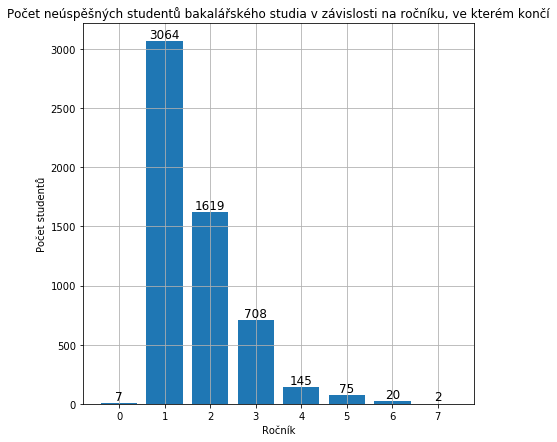

In [109]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_bak)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_bak)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Počet neúspěšných studentů bakalářského studia v závislosti na ročníku, ve kterém končí')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

#### Magistr

<BarContainer object of 5 artists>

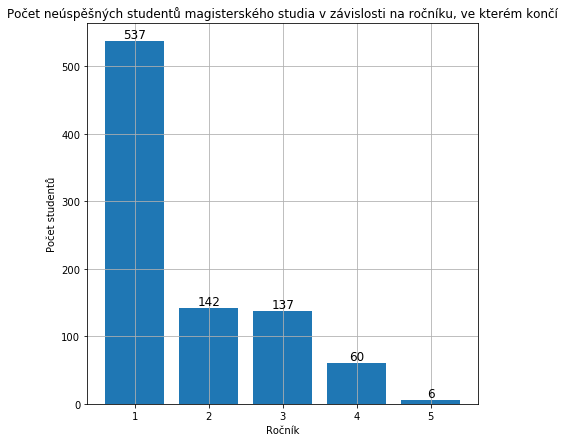

In [113]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_mag)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_mag)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Počet neúspěšných studentů magisterského studia v závislosti na ročníku, ve kterém končí')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

### Ročník, ve kterém studenti ukončí úspěšně studium

#### Bakalář

<BarContainer object of 6 artists>

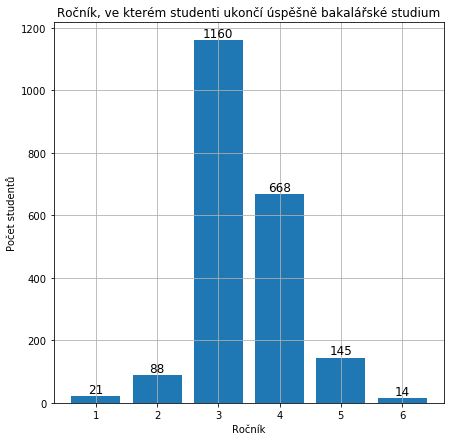

In [115]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_bak)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_bak)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Ročník, ve kterém studenti ukončí úspěšně bakalářské studium')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

#### Magistr

<BarContainer object of 5 artists>

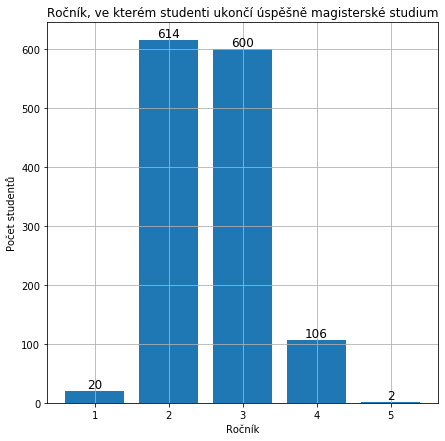

In [116]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_mag)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_mag)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Ročník, ve kterém studenti ukončí úspěšně magisterské studium')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

### Rozdíl mezi rokem maturity a rokem nástupu v letech

#### Bakalář

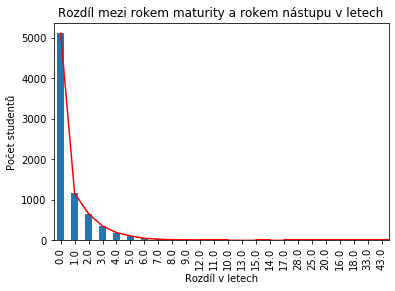

In [5]:
ax = matrix_bak.maturita_nastup_rozdil.value_counts().plot(color='red')
ax.set_xlabel('Rozdíl v letech')
ax.set_ylabel('Počet studentů')
matrix_bak.maturita_nastup_rozdil.value_counts().plot.bar(ax=ax, title='Rozdíl mezi rokem maturity a rokem nástupu v letech')

### Úspěšnost studentů v souvislosti s rozdílem mezi rokem maturity a nástupu do studia - Bakalář

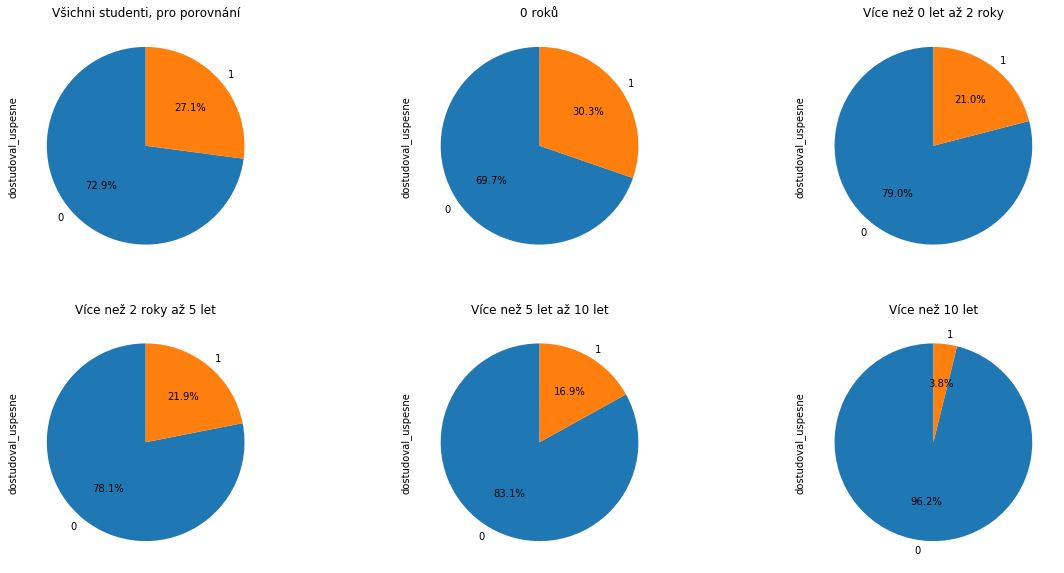

In [6]:
plt.figure(figsize=(20,10))

plt.subplot(231)
matrix_bak.dostudoval_uspesne.value_counts().plot.pie(title="Všichni studenti, pro porovnání", 
                                                      startangle=90, autopct='%1.1f%%')
plt.subplot(232)
matrix_bak[matrix_bak.maturita_nastup_rozdil == 0].dostudoval_uspesne.value_counts().plot.pie(title="0 roků", 
                                                                                              startangle=90, autopct='%1.1f%%')
plt.subplot(233)
matrix_bak[(matrix_bak.maturita_nastup_rozdil != 0)
          & (matrix_bak.maturita_nastup_rozdil <= 2)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 0 let až 2 roky",
                                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(234)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 2)
          & (matrix_bak.maturita_nastup_rozdil <= 5)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 2 roky až 5 let", 
                                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(235)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 5)
          & (matrix_bak.maturita_nastup_rozdil <= 10)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 5 let až 10 let", 
                                                                                                  startangle=90, autopct='%1.1f%%')
plt.subplot(236)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 10)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 10 let", 
                                                                                                startangle=90, autopct='%1.1f%%')

### Úspěšnost studentů s českou příslušností a úspěšnost studentů s cizí státní příslušností

#### Bakalář

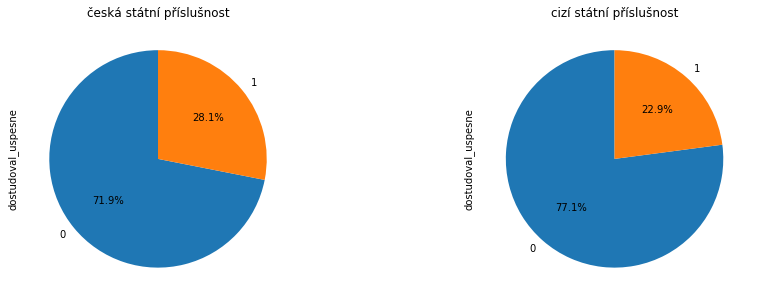

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_bak[(matrix_bak.je_cech == 1)].dostudoval_uspesne.value_counts().plot.pie(title="česká státní příslušnost", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_bak[(matrix_bak.je_cech == 0)].dostudoval_uspesne.value_counts().plot.pie(title="cizí státní příslušnost", startangle=90, autopct='%1.1f%%')

#### Magistr

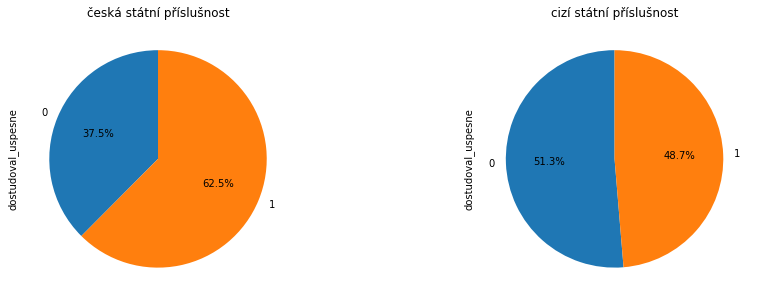

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_mag[(matrix_mag.je_cech == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="česká státní příslušnost", 
                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_mag[(matrix_mag.je_cech == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="cizí státní příslušnost", 
                                                                                 startangle=90, autopct='%1.1f%%')

### Úspěšnost studentů v souvislosti s pohlavím

#### Bakalář

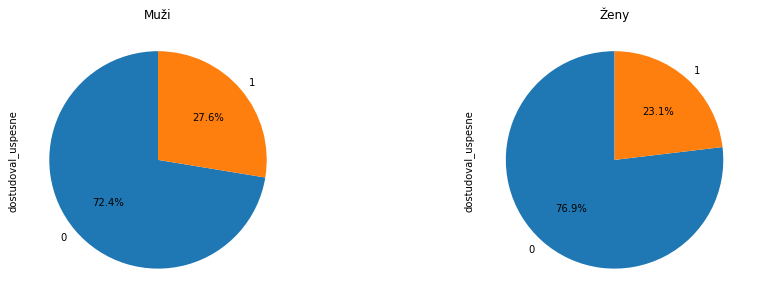

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_bak[(matrix_bak.pohlavi_kod == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Muži", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_bak[(matrix_bak.pohlavi_kod == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Ženy", startangle=90, autopct='%1.1f%%')

#### Magistr

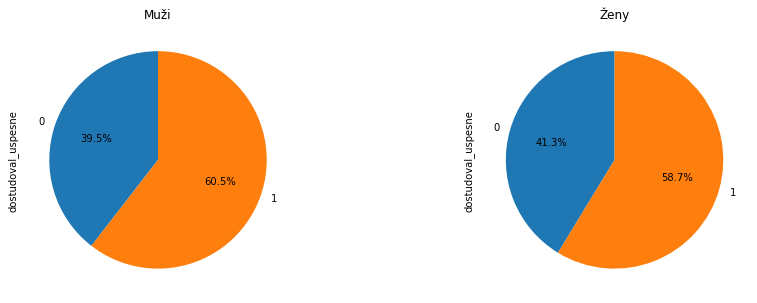

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_mag[(matrix_mag.pohlavi_kod == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Muži", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_mag[(matrix_mag.pohlavi_kod == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Ženy", startangle=90, autopct='%1.1f%%')

### BI-DPR přehled

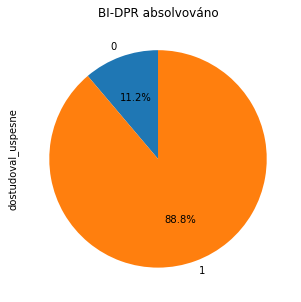

In [117]:
plt.figure(figsize=(15,5))

matrix_bak[(matrix_bak['BI-DPR'].notna())].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="BI-DPR absolvováno", startangle=90, autopct='%1.1f%%')

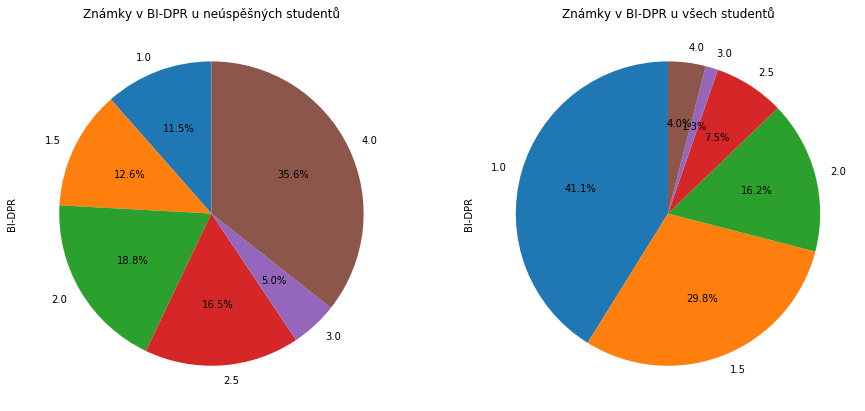

In [128]:
plt.figure(figsize=(15,10))

plt.subplot(121)
matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(failed_students_bak))]['BI-DPR'].value_counts().sort_index().plot.pie(title="Známky v BI-DPR u neúspěšných studentů", startangle=90, autopct='%1.1f%%')

plt.subplot(122)
matrix_bak[(matrix_bak['BI-DPR'].notna())]['BI-DPR'].value_counts().sort_index().plot.pie(title="Známky v BI-DPR u všech studentů", startangle=90, autopct='%1.1f%%')

In [129]:
len(matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(failed_students_bak))])

261

In [130]:
len(matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(successful_students_bak))])

2072

## Ukázka průměrné známky a poměru úspěšných zápočtů/zakončení předmětů ku neúspěšným ve vybraných předmětech v průběhu let

### PA1

#### Průměrná známka v předmětu napříč semestry

<ipython-input-87-7f83be33184d>:13: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


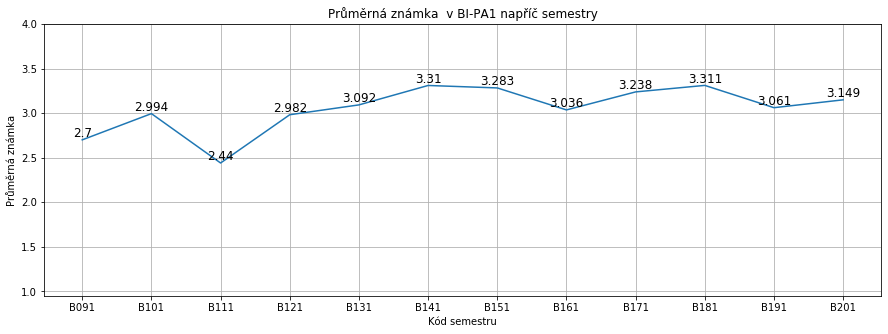

In [87]:
klasifikace_pa1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PA1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))

x = np.array(klasifikace_pa1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_pa1.groupby('semestr_id')['znamka'].mean().values)

plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka  v BI-PA1 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným
* Je vidět velký rozdíl mezi úspěšnými zápočty a úspěšným absolvování předmětu v zimním semestru 2020, jednalo se o první semestr v online formě pro BI-PA1.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


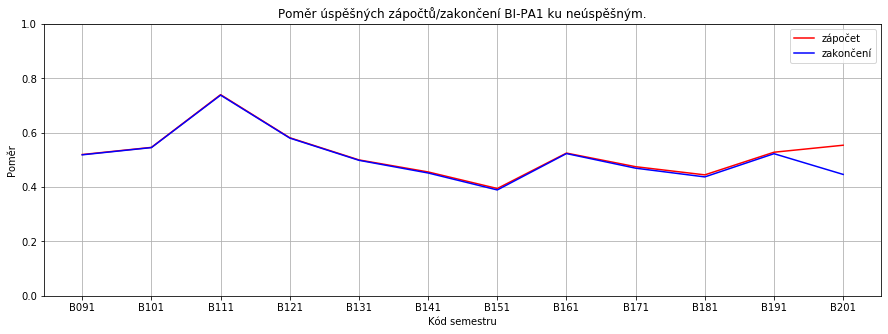

In [86]:
plt.figure(figsize=(15,5))

xa = klasifikace_pa1.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_pa1.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_pa1.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_pa1.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PA1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### ZMA

<ipython-input-85-adf8e21317b0>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


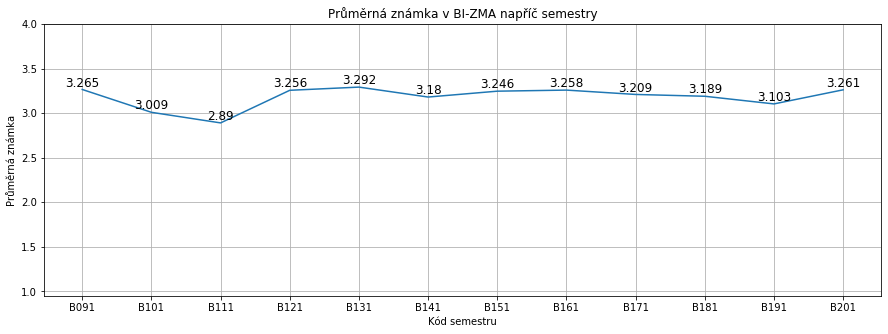

In [85]:
klasifikace_zma = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-ZMA'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_zma.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_zma.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-ZMA napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

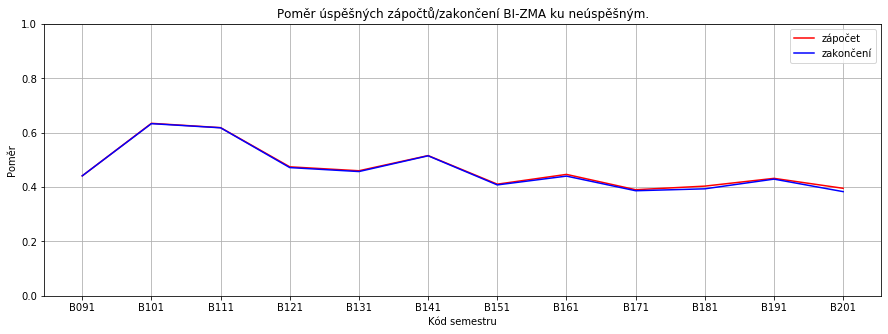

In [84]:
plt.figure(figsize=(15,5))

xa = klasifikace_zma.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_zma.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_zma.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_zma.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-ZMA ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### AAG
Bohužel u předmětu BI-AAG nemám záznamy z roku 2009.

<ipython-input-68-3882698d1307>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


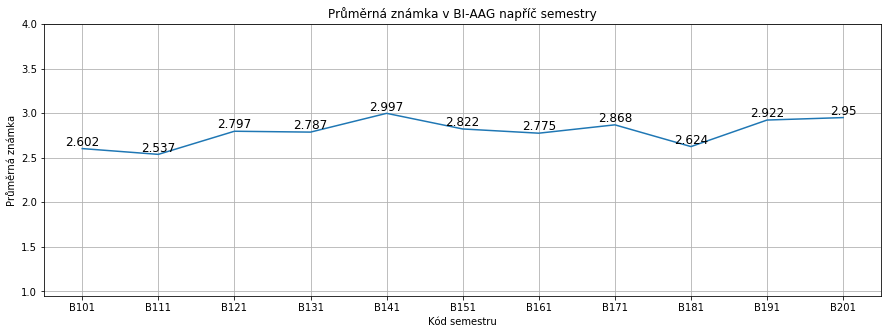

In [68]:
klasifikace_aag = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-AAG'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_aag.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_aag.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-AAG napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


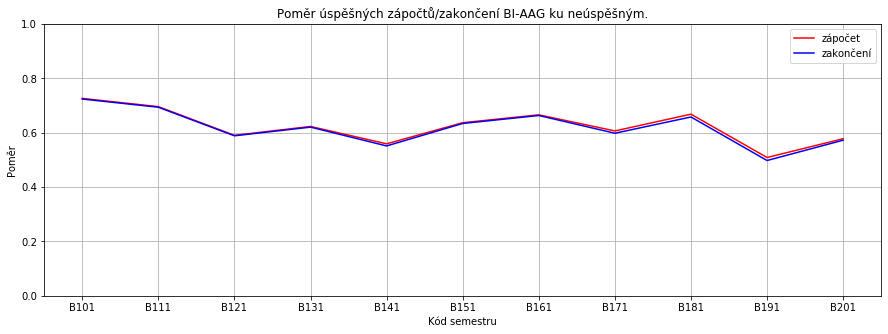

In [69]:
plt.figure(figsize=(15,5))

xa = klasifikace_aag.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_aag.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_aag.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_aag.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-AAG ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### AG1
* Předmět je vyučoován od roku 2016. Je na něm vidět rostoucí tendence průměru v průběhu let. 

<ipython-input-70-bcb4fc892ba6>:12: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


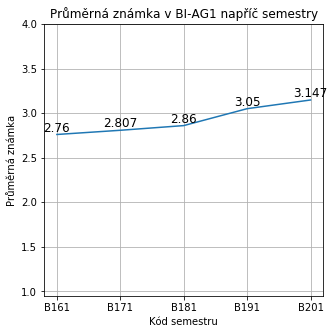

In [70]:
klasifikace_ag1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-AG1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(5,5))
x = np.array(klasifikace_ag1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_ag1.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-AG1 napříč semestry')
plt.grid(True)

plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

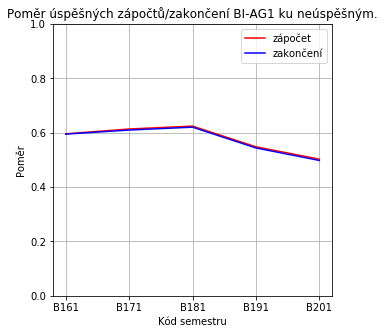

In [71]:
plt.figure(figsize=(5,5))

xa = np.array(klasifikace_ag1.groupby('semestr_id')['zapocteno'].mean().index)
ya = np.array(klasifikace_ag1.groupby('semestr_id')['zapocteno'].mean().values)

xb = np.array(klasifikace_ag1.groupby('semestr_id')['zakonceno'].mean().index)
yb = np.array(klasifikace_ag1.groupby('semestr_id')['zakonceno'].mean().values)

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-AG1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### CAO

<ipython-input-88-8b5545ef3817>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


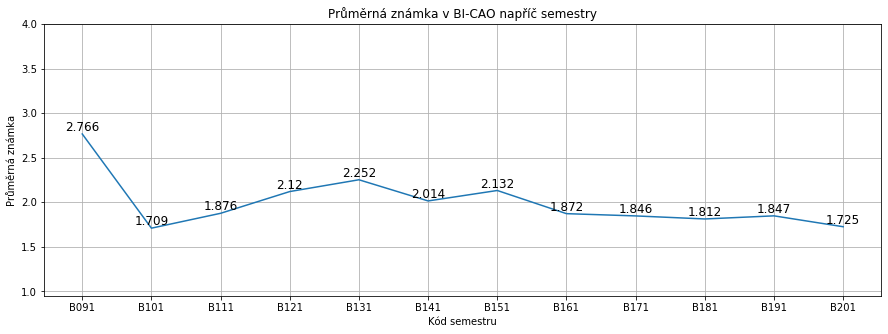

In [88]:
klasifikace_cao = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-CAO'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_cao.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_cao.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-CAO napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


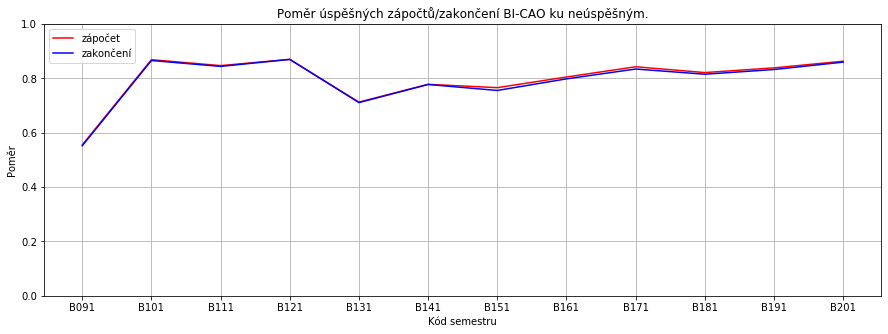

In [75]:
plt.figure(figsize=(15,5))

xa = klasifikace_cao.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_cao.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_cao.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_cao.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-CAO ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### LIN

<ipython-input-89-ef1fbddca89b>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


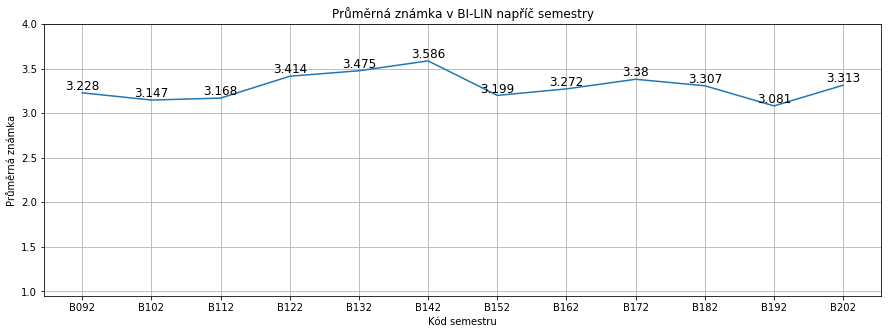

In [89]:
klasifikace_lin = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-LIN'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_lin.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_lin.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-LIN napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


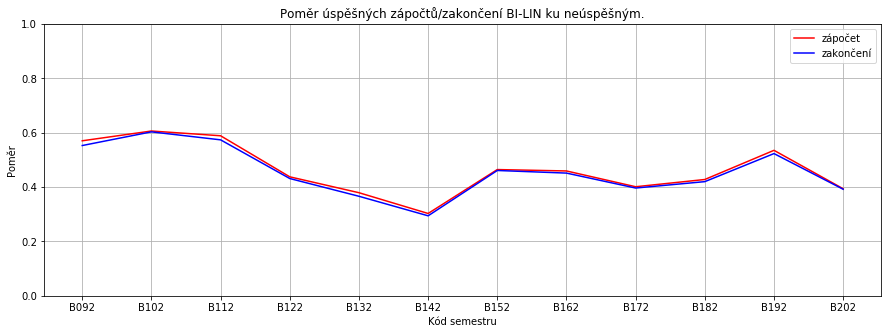

In [77]:
plt.figure(figsize=(15,5))

xa = klasifikace_lin.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_lin.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_lin.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_lin.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-LIN ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### MLO

<ipython-input-90-379de88c27b6>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


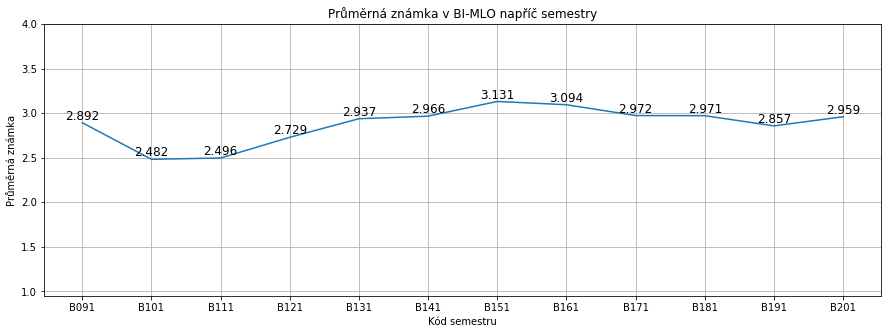

In [90]:
klasifikace_mlo = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-MLO'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_mlo.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_mlo.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-MLO napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


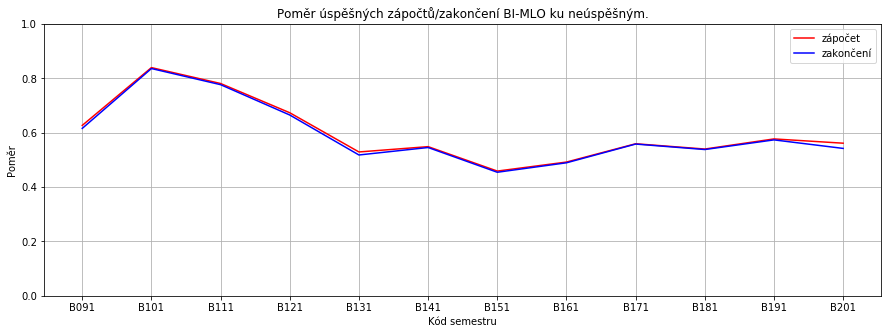

In [79]:
plt.figure(figsize=(15,5))

xa = klasifikace_mlo.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_mlo.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_mlo.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_mlo.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-MLO ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### PS1
* Do roku 2015 se vyučoval i v letním semestru. Výjimkou je rok 2010, kde se vyučoval pouze v zimním semestru. Od roku 2016 už pouze v zimním. Až na letní semestr 2011, ve kterém byl celkově nejhorší průměr, je vidět, že průměr v letních semestrech je lepší v porovnání se zimním semestrem ve stejném roce. Od roku 2016 je vidět klesající tendence průměru. V semestru B171 došlo k přechodu průběžných týdenních testů z papírové formy do systému Learnshell. Od semestru B191 se semestrální testy píši v systému Learnshell namísto dosavadního systému Progtest. Je zde vidět pokles průměru. Nejnižší průměr je v semestru B201, v tomto semestru zároveň došlo k prvnímu běhu předmětu v online formě. 

<ipython-input-91-a8bf90c923a6>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


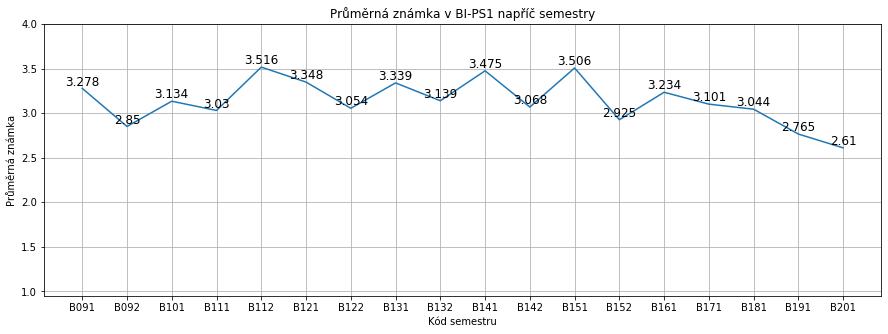

In [91]:
klasifikace_ps1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PS1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
x = np.array(klasifikace_ps1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_ps1.groupby('semestr_id')['znamka'].mean().values)
plt.title('Průměrná známka v BI-PS1 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným
* BI-PS1 je zakončen klasifikovaným zápočtem, pro jsou oba poměry totožné. 

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


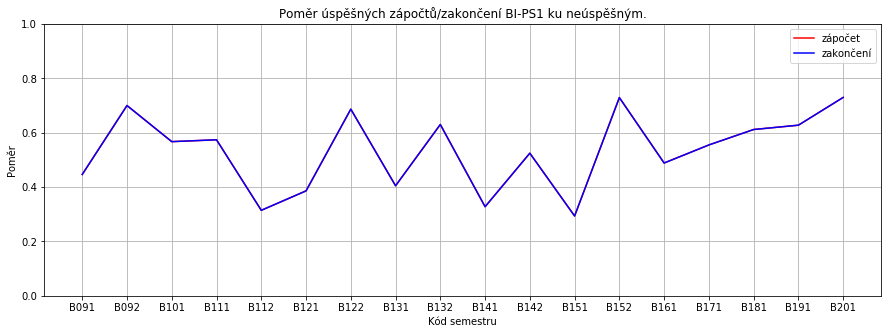

In [81]:
plt.figure(figsize=(15,5))

xa = klasifikace_ps1.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_ps1.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_ps1.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_ps1.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PS1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### PA2
* U BI-PA2 je dobře rozpoznatelný letní semestr 2019, ve kterém začala covidová opatření a poprvé se přešlo na online výuku. Průměrná známka se zlepšila ze známky E (3.0 <= E < 4.0) na známku C (2.0 <= C < 2.5). To může být způsobeno tím, že odpadla zkouška, která byla plně nahrazena pouze obhájením semestrální práce, průběžné testy si mohli studenti plnit sami doma a získat tak více bodů, či tím, že PA2 byl jeden z mála předmětů , kde byla již od začátku kvalitní online výuka (kvalitní záznamy přednášek a proseminářu). 

<ipython-input-92-3c3f6dd20ef5>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


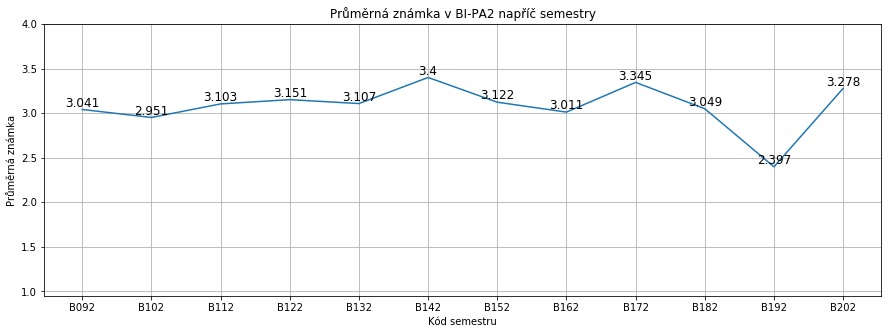

In [92]:
klasifikace_pa2 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PA2'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B211')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
x = np.array(klasifikace_pa2.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_pa2.groupby('semestr_id')['znamka'].mean().values)
plt.title('Průměrná známka v BI-PA2 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


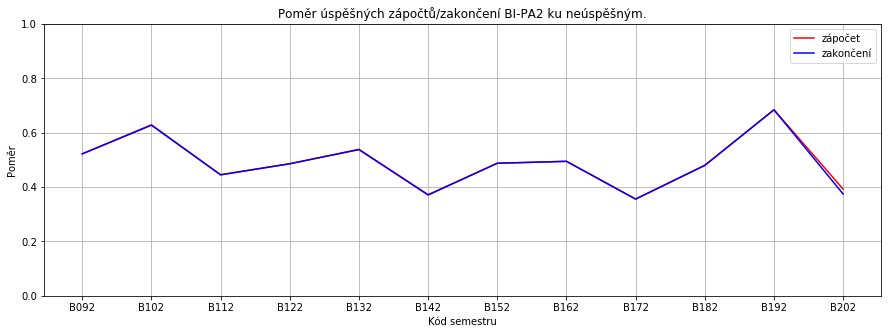

In [83]:
plt.figure(figsize=(15,5))

xa = klasifikace_pa2.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_pa2.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_pa2.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_pa2.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PA2 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### Průměry v povinných předmětech

#### Bakalář

Text(0.5, 1.0, 'Průměry známek všech studentů v PP předmětech bakalářského studia')

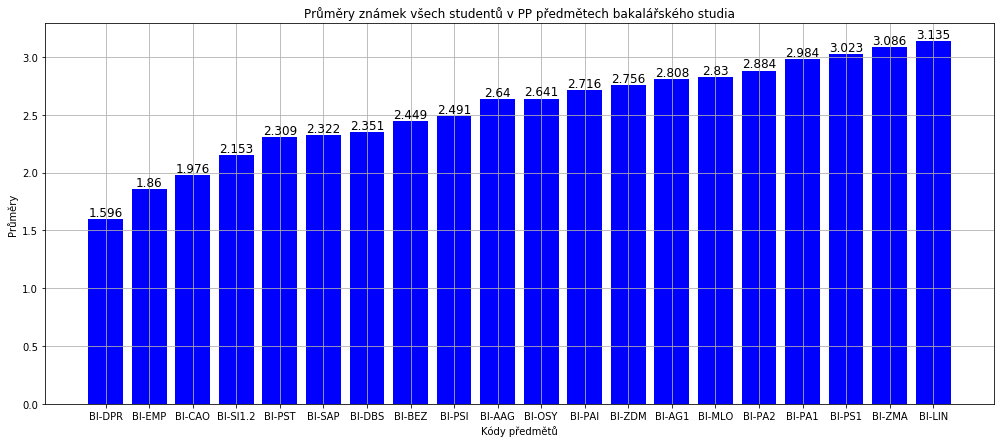

In [189]:
courses_matrix_bak = courses_matrix_bak.set_index('studium_id')

plt.figure(figsize=(17,7))

x = np.array(round(courses_matrix_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(courses_matrix_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek všech studentů v PP předmětech bakalářského studia')

##### Průměry úspěšných studentů

Text(0.5, 1.0, 'Průměry známek úspěšných studentů v PP předmětech bakalářského studia')

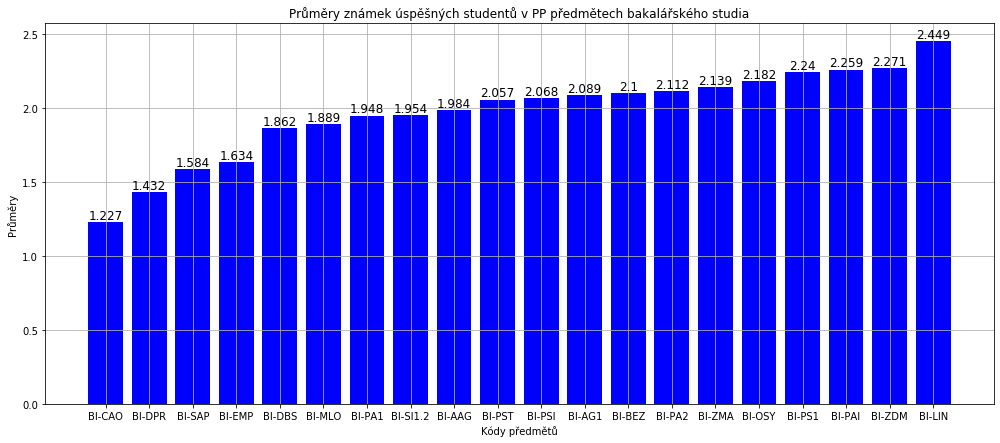

In [187]:
success_bak = courses_matrix_bak[courses_matrix_bak.index.isin(successful_students_bak)]

plt.figure(figsize=(17,7))

x = np.array(round(success_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(success_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek úspěšných studentů v PP předmětech bakalářského studia')

##### Průměry neúspěšných studentů

Text(0.5, 1.0, 'Průměry známek neúspěšných studentů v PP předmětech bakalářského studia')

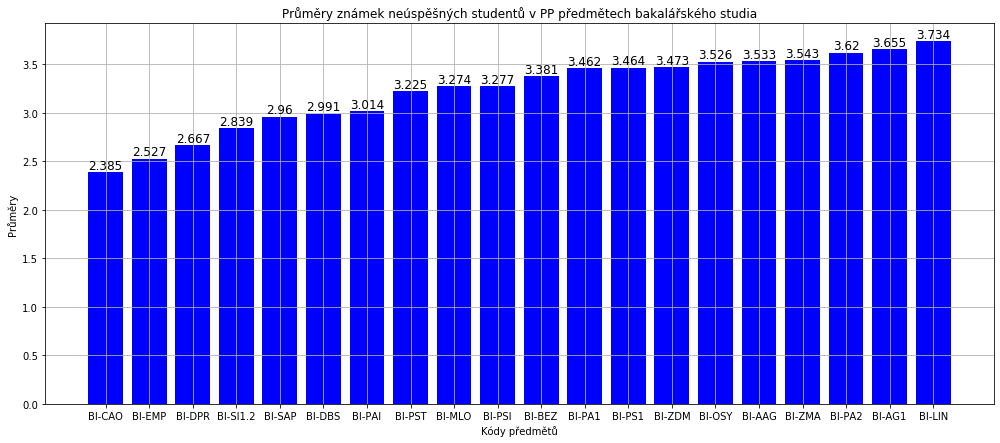

In [188]:
fail_bak = courses_matrix_bak[courses_matrix_bak.index.isin(failed_students_bak)]

plt.figure(figsize=(17,7))

x = np.array(round(fail_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek neúspěšných studentů v PP předmětech bakalářského studia')

#### Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia

Text(0.5, 1.0, 'Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia')

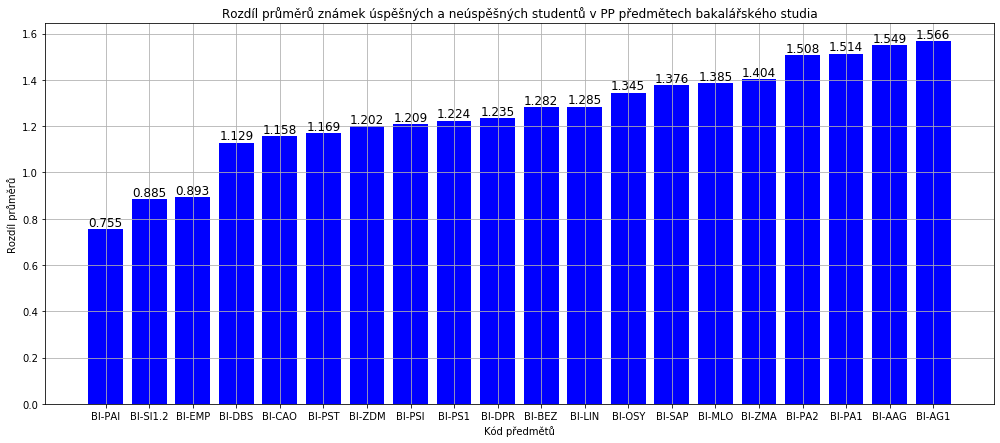

In [181]:
plt.figure(figsize=(17,7))

x = np.array(round(fail_bak.mean() - success_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_bak.mean() - success_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kód předmětů')
plt.ylabel('Rozdíl průměrů')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia')

#### Magistr

Text(0.5, 1.0, 'Průměry známek všech studentů v PP předmětech magisterského studia')

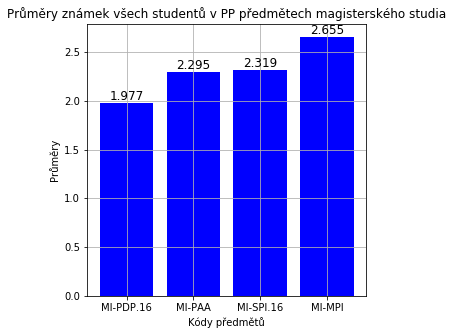

In [218]:
#courses_matrix_mag = courses_matrix_mag.set_index('studium_id')

plt.figure(figsize=(5,5))

x = np.array(round(courses_matrix_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(courses_matrix_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek všech studentů v PP předmětech magisterského studia')

#### Průměry úspěšných studentů

Text(0.5, 1.0, 'Průměry známek úspěšných studentů v PP předmětech magisterského studia')

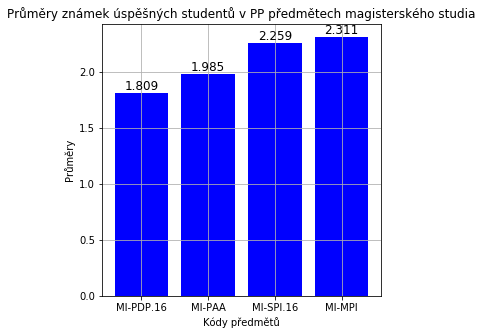

In [229]:
success_mag = courses_matrix_mag[courses_matrix_mag.index.isin(successful_students_mag)]

plt.figure(figsize=(5,5))

x = np.array(round(success_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(success_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek úspěšných studentů v PP předmětech magisterského studia')

#### Průměry neúspěšných studentů

Text(0.5, 1.0, 'Průměry známek neúspěšných studentů v PP předmětech magisterského studia')

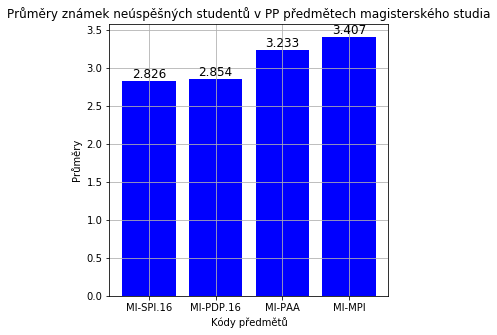

In [222]:
fail_mag = courses_matrix_mag[courses_matrix_mag.index.isin(failed_students_mag)]

plt.figure(figsize=(5, 5))

x = np.array(round(fail_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek neúspěšných studentů v PP předmětech magisterského studia')

#### Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia

Text(0.5, 1.0, 'Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech magisterského studia')

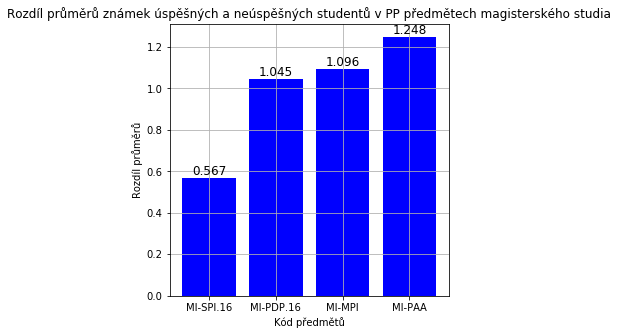

In [224]:
plt.figure(figsize=(5, 5))

x = np.array(round(fail_mag.mean() - success_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_mag.mean() - success_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kód předmětů')
plt.ylabel('Rozdíl průměrů')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech magisterského studia')